In [3]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sqlalchemy import create_engine

plt.style.use("classic")

from config import db_key

%matplotlib inline

# Data Loading and Exploration

In [3]:
# import dataset and show random sample
housing_df = pd.read_csv('Resources/boston.csv')
housing_df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
396,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,666.0,20.2,396.90,19.37,12.5
21,0.85204,0.0,8.14,0,0.538,5.965,89.2,4.0123,4,307.0,21.0,392.53,13.83,19.6
244,0.20608,22.0,5.86,0,0.431,5.593,76.5,7.9549,7,330.0,19.1,372.49,12.50,17.6
486,5.69175,0.0,18.10,0,0.583,6.114,79.8,3.5459,24,666.0,20.2,392.68,14.98,19.1
428,7.36711,0.0,18.10,0,0.679,6.193,78.1,1.9356,24,666.0,20.2,96.73,21.52,11.0


In [4]:
# view data shape
housing_df.shape

(506, 14)

In [5]:
# view data types
housing_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [6]:
# view all columns
columns = housing_df.columns
columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [7]:
# view descriptive statistics for each column
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
# count nulls
housing_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
# show descriptive statistics for target variable
housing_df.MEDV.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

# Feature Analysis

In [10]:
# show skew values for each feature
skew_val = housing_df.skew().sort_values(ascending=False)
skew_val

CRIM       5.223149
CHAS       3.405904
ZN         2.225666
MEDV       1.108098
DIS        1.011781
RAD        1.004815
LSTAT      0.906460
NOX        0.729308
TAX        0.669956
RM         0.403612
INDUS      0.295022
AGE       -0.598963
PTRATIO   -0.802325
B         -2.890374
dtype: float64

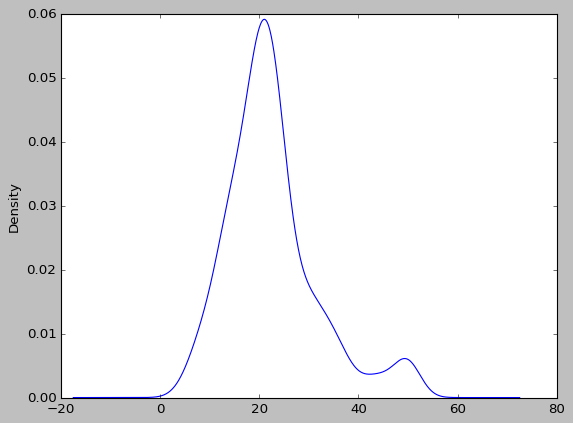

In [11]:
# plot distribution of target feature
density = housing_df.MEDV.plot.kde()

In [13]:
housing_df.MEDV.value_counts()

50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: MEDV, Length: 229, dtype: int64

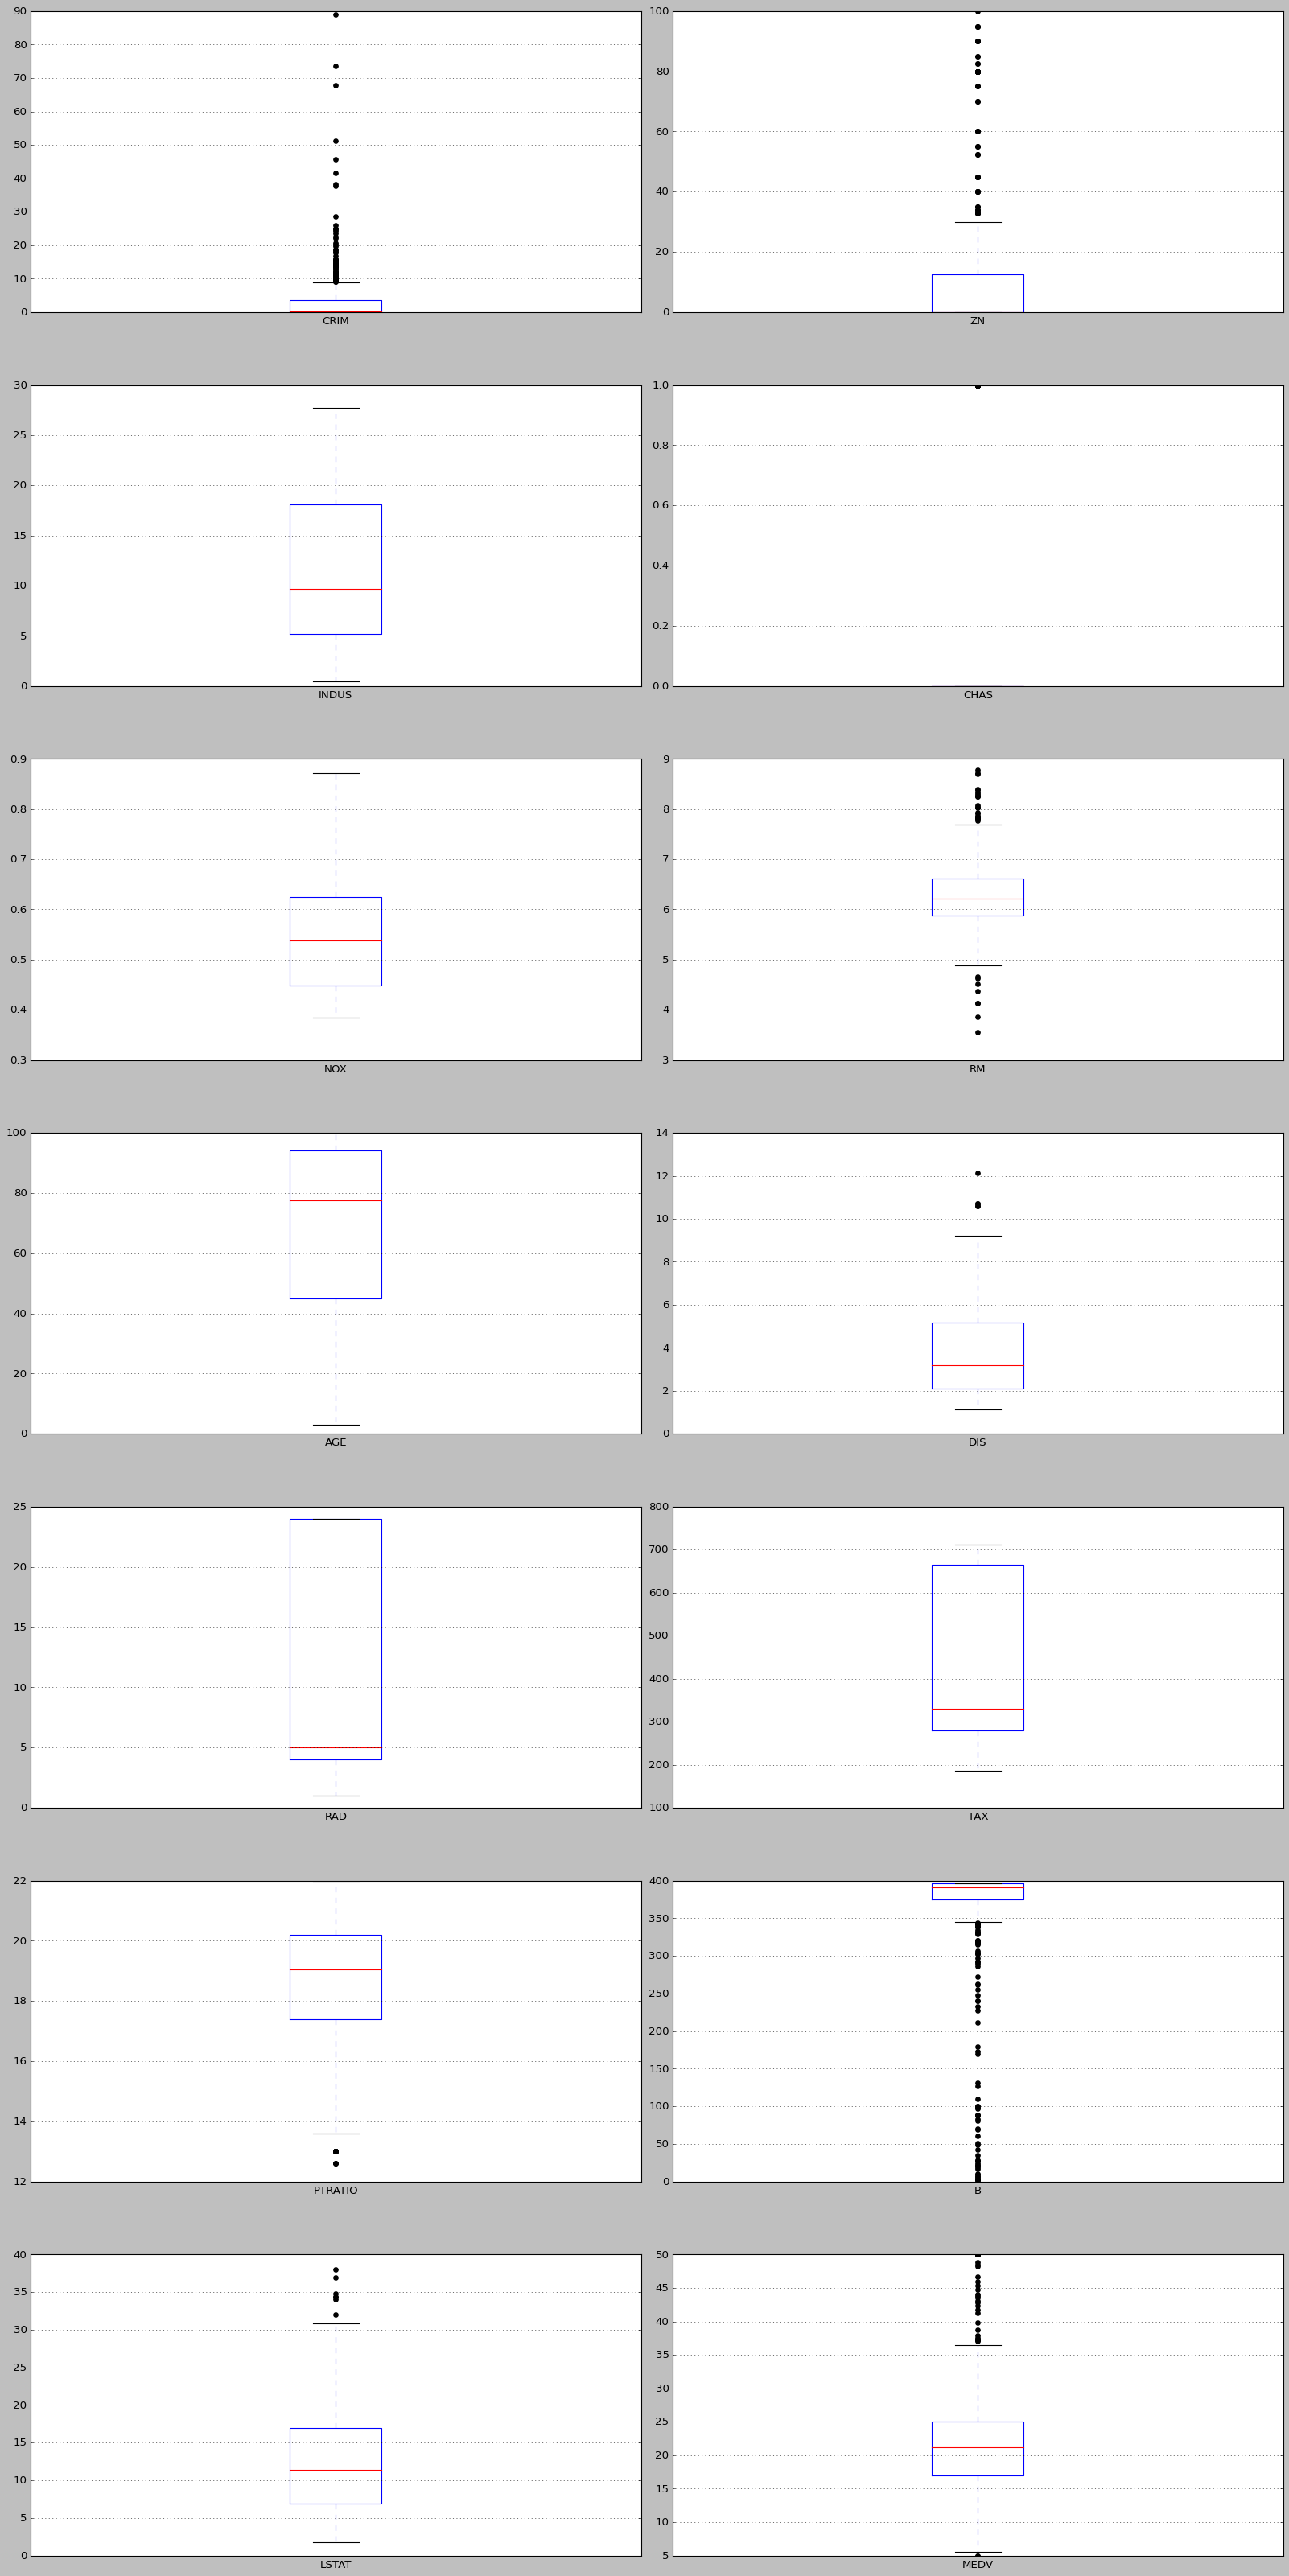

In [12]:
# create box plot for each feature, check for outliers 

# set plot arrangement
rows = 7
cols = 2
# create figure
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize= (20,40))
index=0
ax = ax.flatten()
# loop through columns creating boxplots for each and adding to figure using ax index
for col in columns:
    housing_df.boxplot(column=[col], ax=ax[index],flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'black'})
    index += 1

plt.tight_layout(pad = 0.5,w_pad =0.7 , h_pad =5)


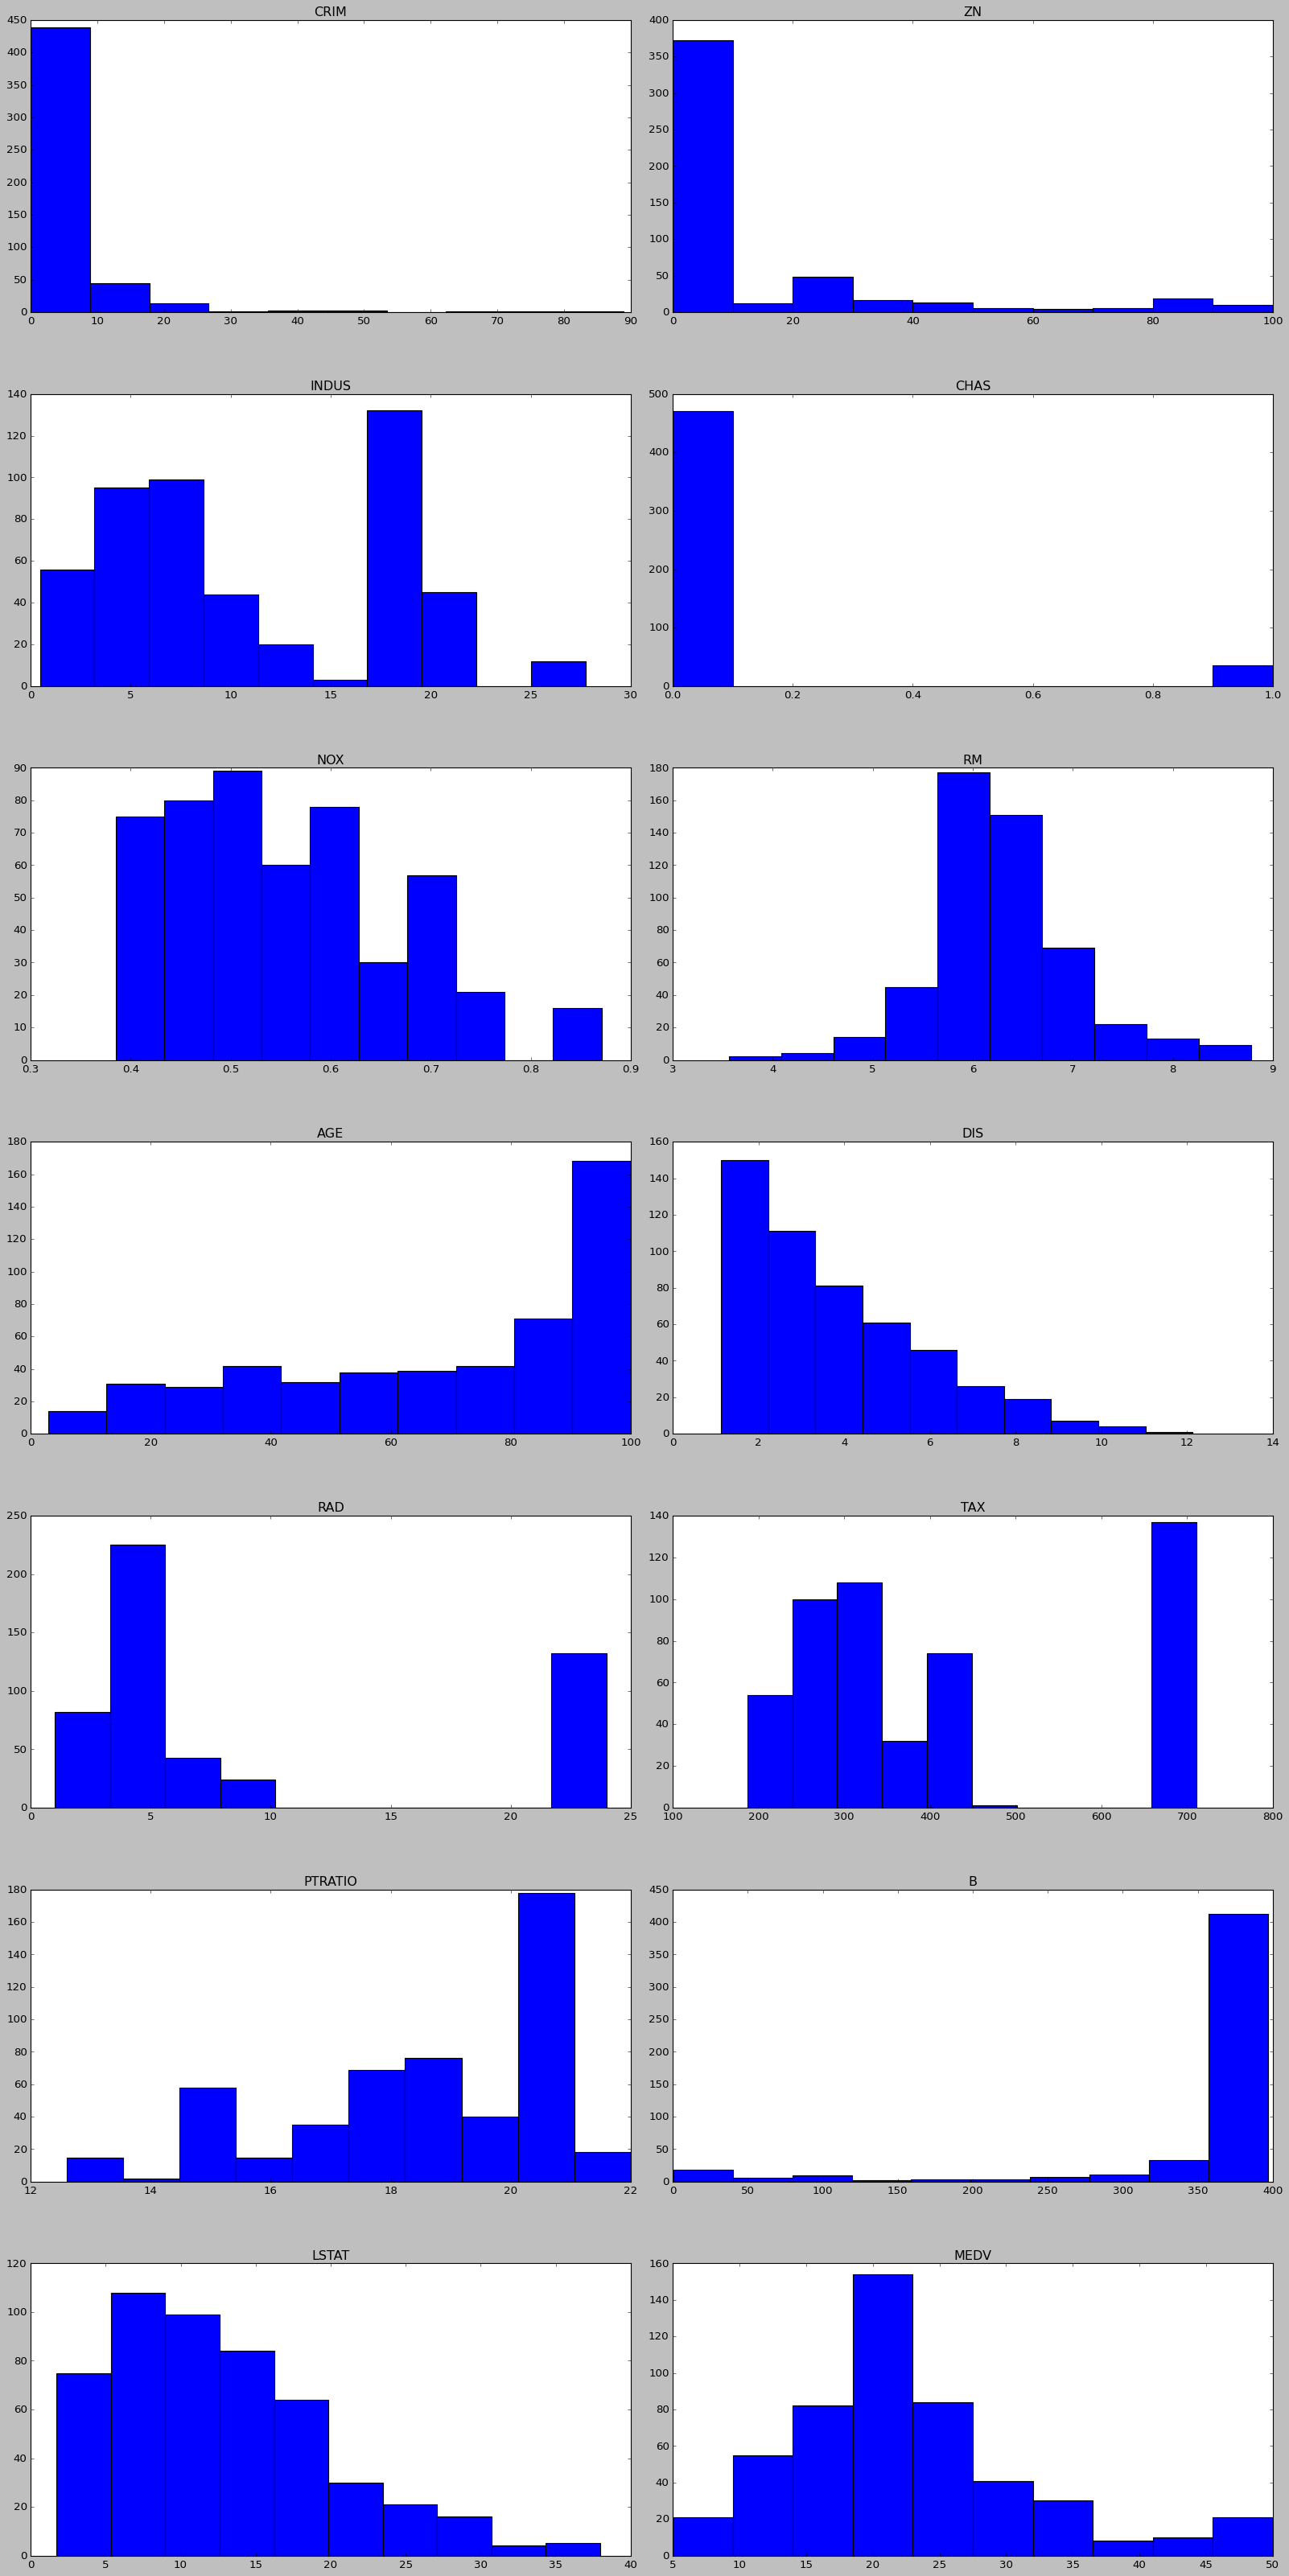

In [14]:
# create density plots for each feature, check distribution

# set plot arrangement
rows = 7
cols = 2
# create figure
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize= (20,40))
index=0
ax = ax.flatten()
# loop through columns creating dist plot for each and adding to the figure using ax index
for col in columns:
    ax[index].hist(housing_df[col])
    ax[index].set_title(col)
    index += 1

plt.tight_layout(pad = 0.5,w_pad =0.7 , h_pad =5)

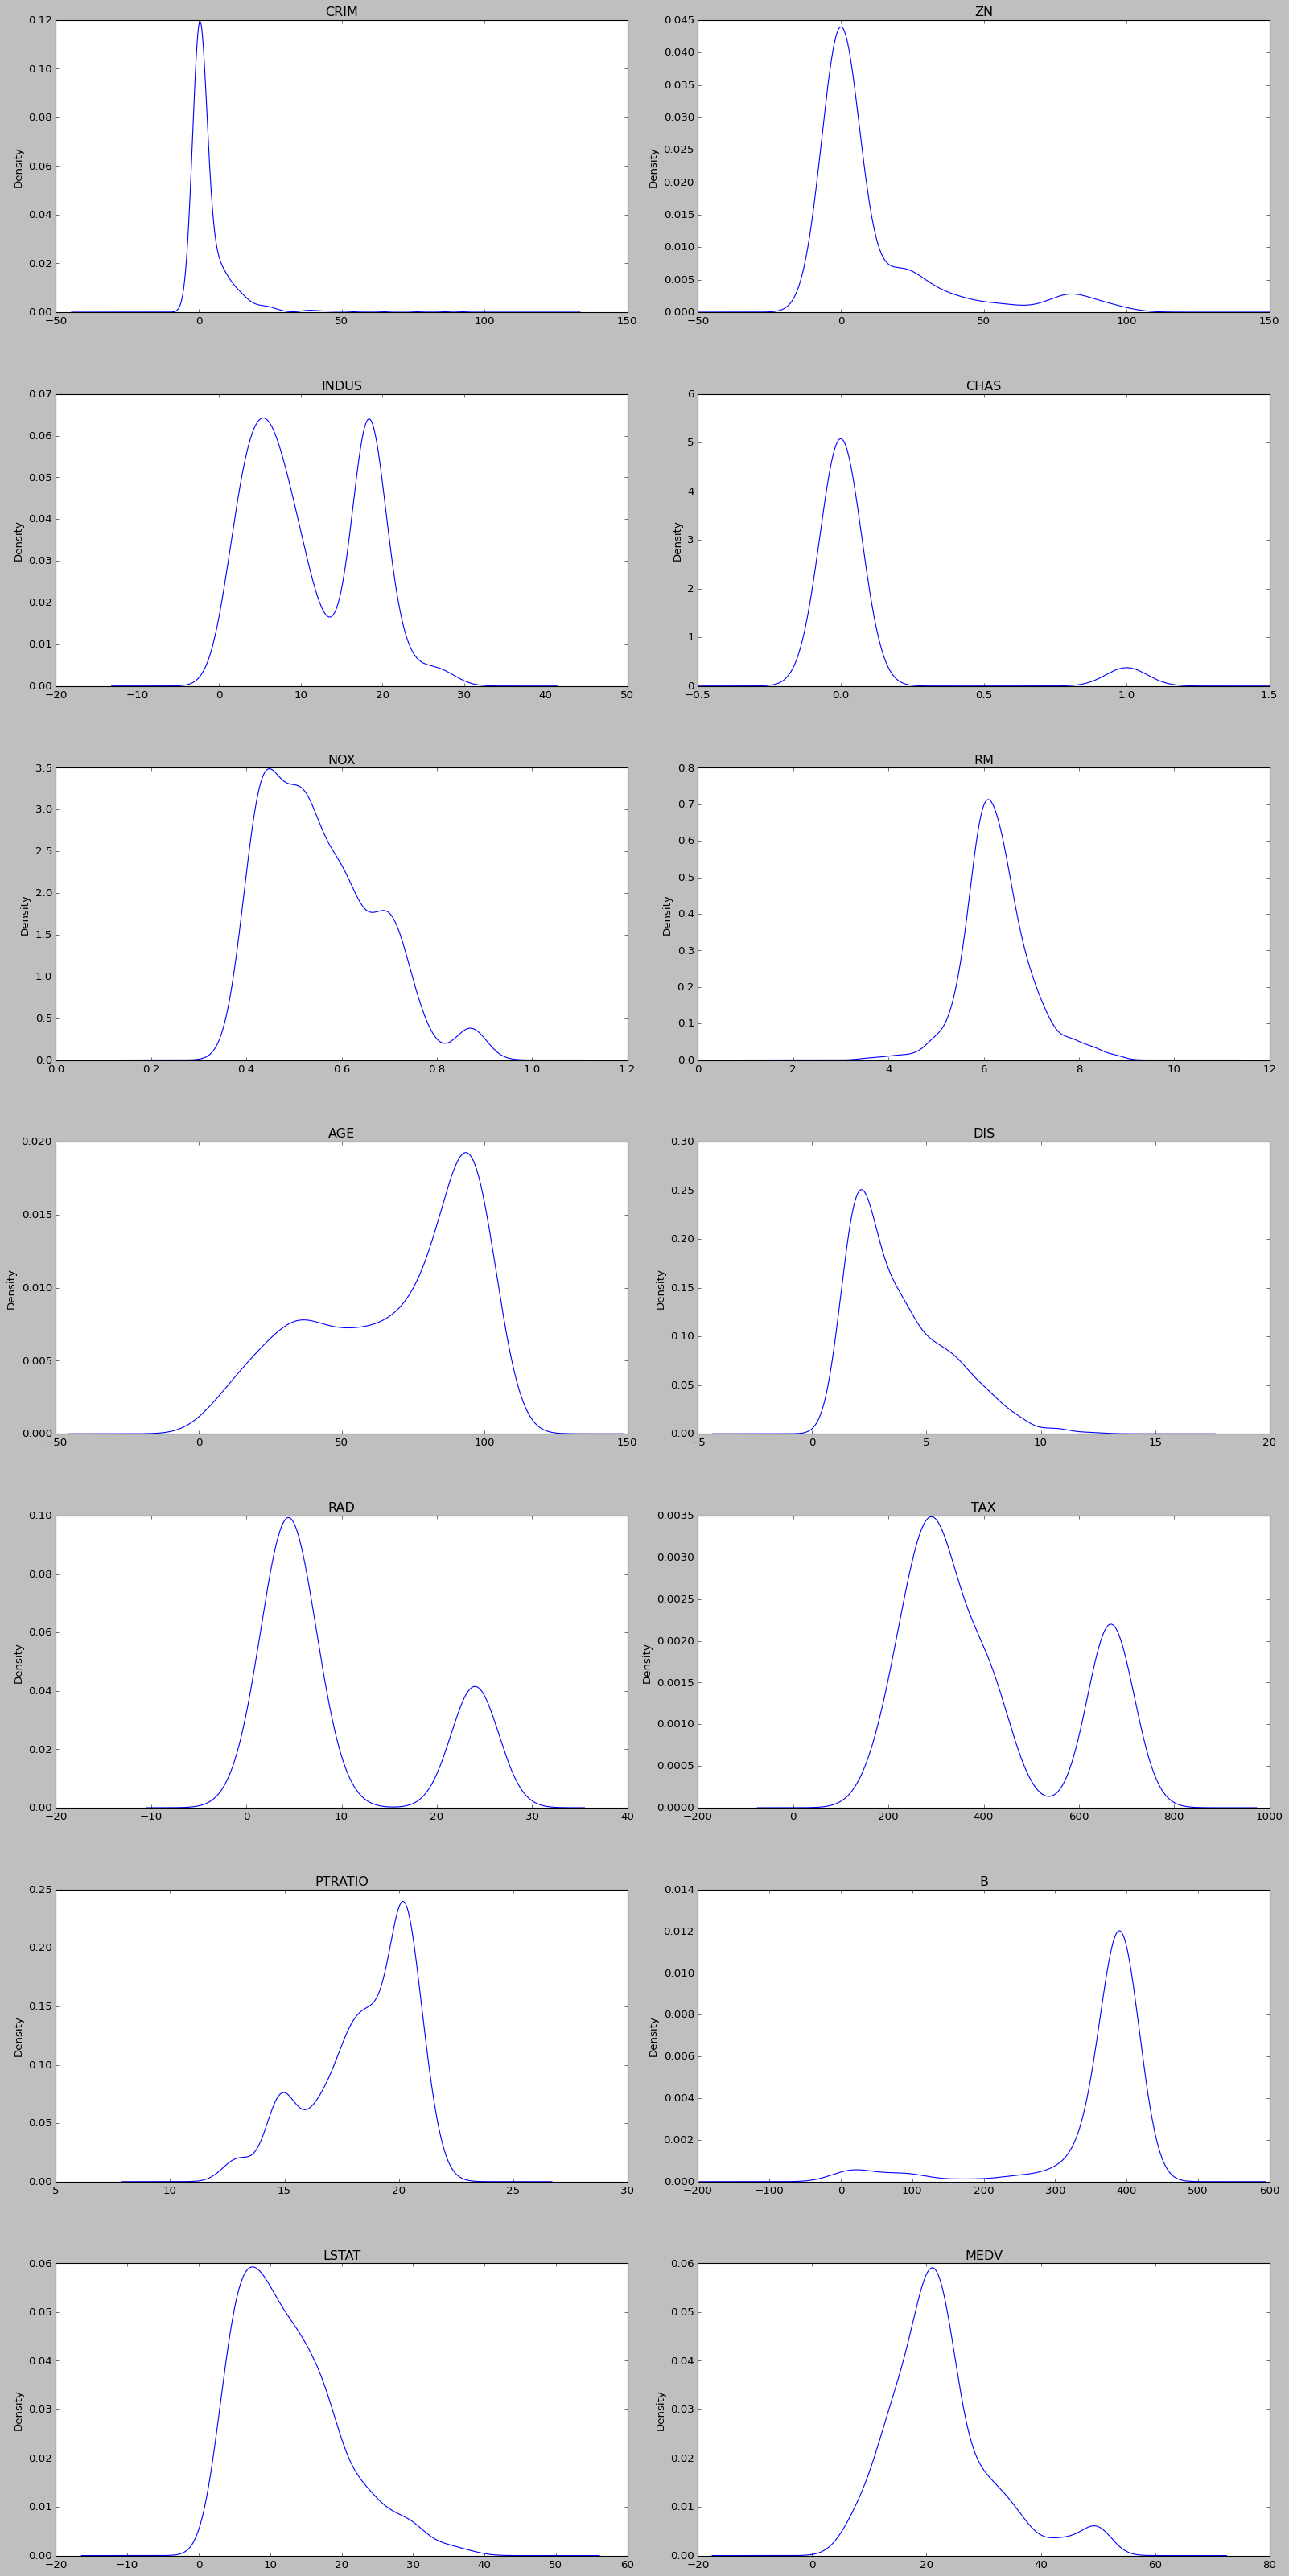

In [15]:
# create density plots for each feature, check distribution

# set plot arrangment
rows = 7
cols = 2
# create figure
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize= (20,40))
index=0
ax = ax.flatten()
# loop through columns creating density plots for each, adding to figure with ax index
for col in columns:
    housing_df[col].plot.kde(ax=ax[index])
    ax[index].set_title(col)
    index += 1

plt.tight_layout(pad = 0.5,w_pad =0.7 , h_pad =5)


<AxesSubplot:>

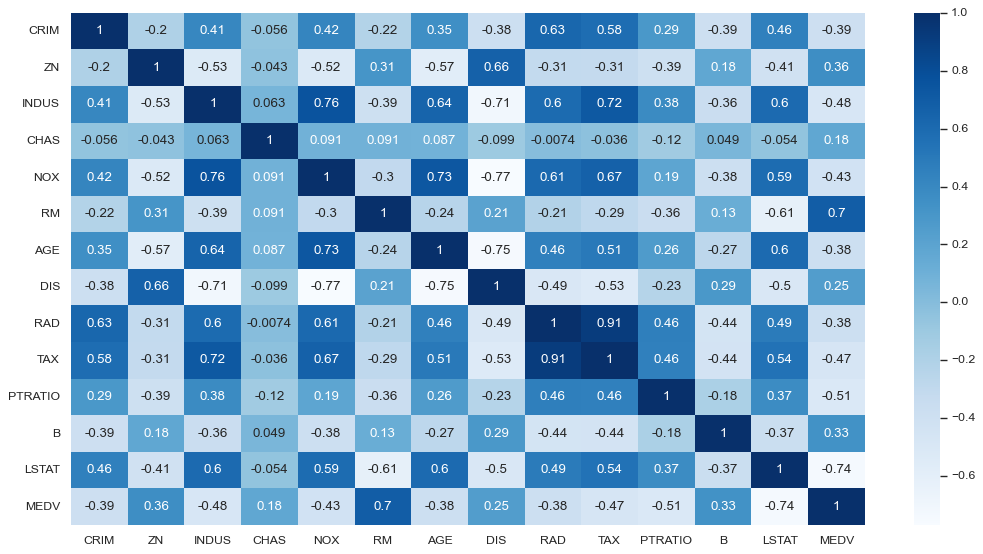

In [16]:
# create and map correlation matrix

# create correlation matrix df
corr = housing_df.corr()
# create heatmap from correlation df
sns.set(rc={'figure.figsize':(16,8)})
sns.heatmap(corr, annot=True, cmap='Blues')

In [17]:
# unstack and sort absolute correlation values to show top correlations
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[14:28:2]

TAX    RAD      0.910228
NOX    DIS      0.769230
INDUS  NOX      0.763651
AGE    DIS      0.747881
MEDV   LSTAT    0.737663
NOX    AGE      0.731470
TAX    INDUS    0.720760
dtype: float64

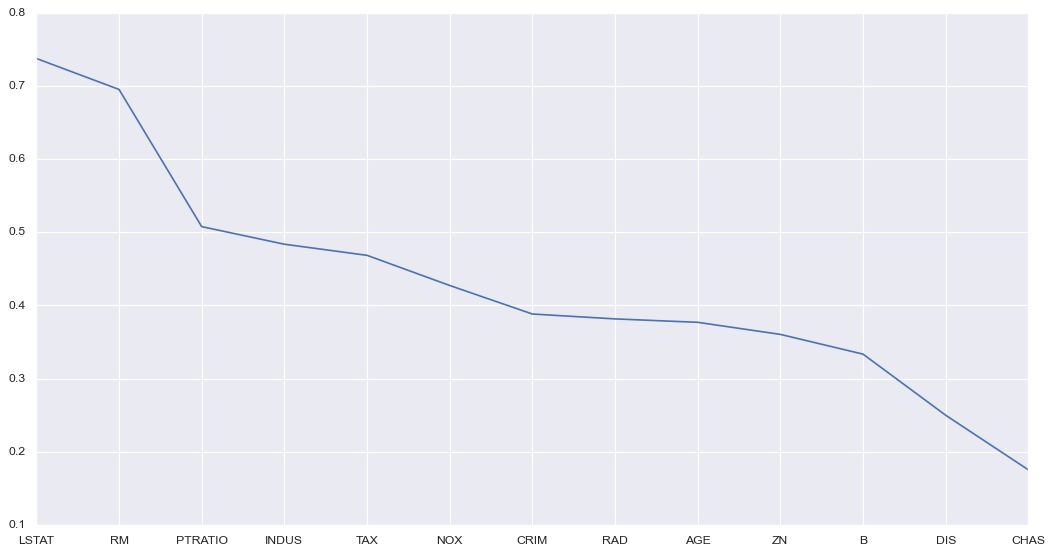

In [18]:
# plot target variables absolute correlation values in descending order
plt.plot(abs(housing_df.corr())['MEDV'].sort_values(ascending=False)[1:], label='Correlation')

# High Correlation Feature Visuals

In [19]:
# add an id column to dataframe
housing_df['ID'] = housing_df.index
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,ID
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,2
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,3
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,4


Text(0, 0.5, 'MEDV')

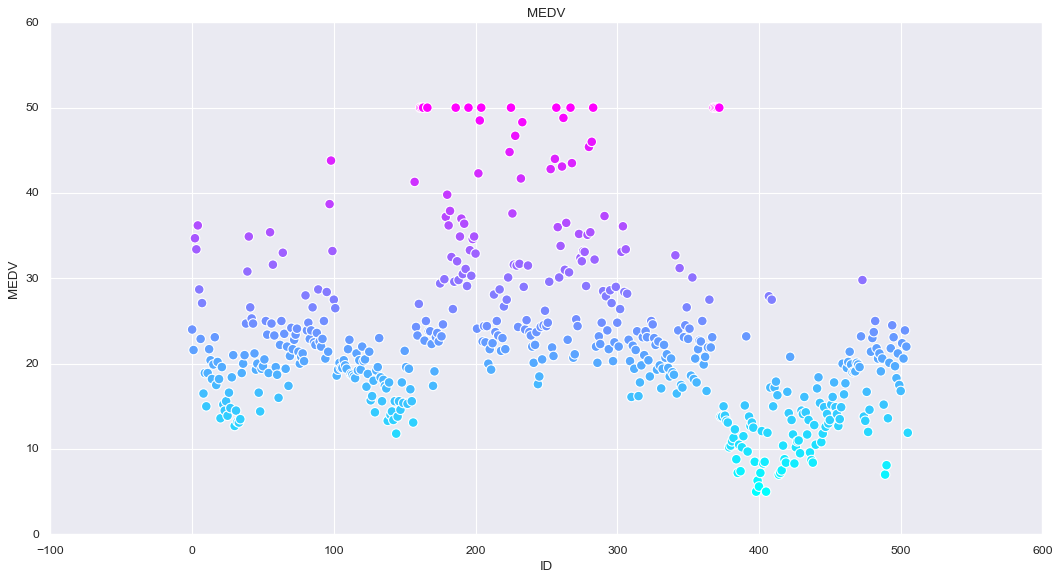

In [20]:
# scatter plot target feature 
plt.scatter(x=housing_df.ID, y=housing_df.MEDV,c=housing_df.MEDV, cmap='cool', s=75)
plt.title('MEDV')
plt.xlabel('ID')
plt.ylabel('MEDV')

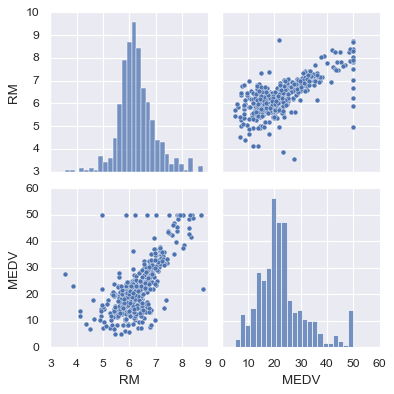

In [21]:
# pairplot RM and MEDV
medv_rm = housing_df[['RM', 'MEDV']]
sns.pairplot(medv_rm)

Text(0, 0.5, 'MEDV')

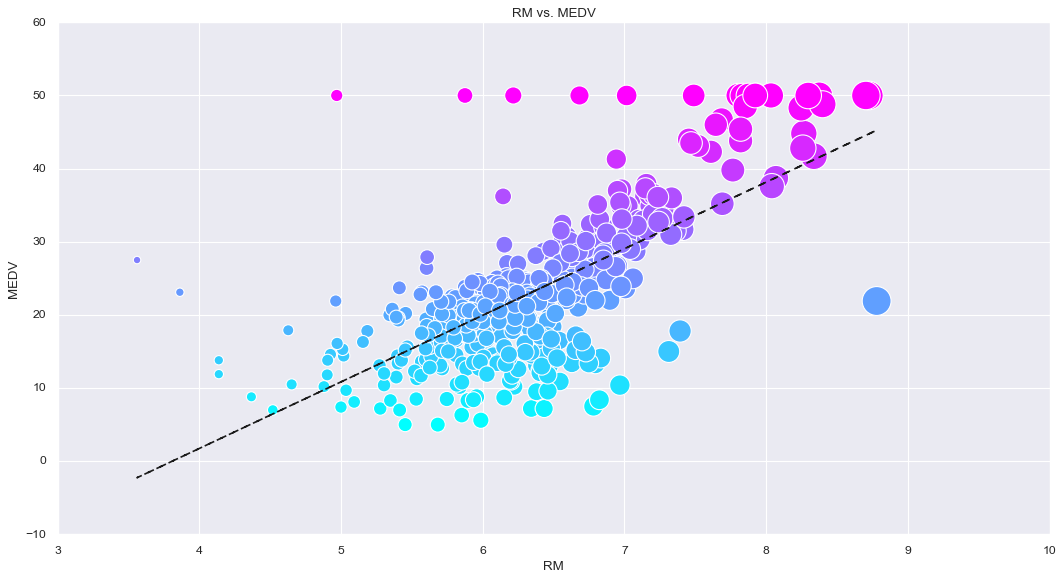

In [22]:
# scatter plot RM and MEDV with linear regression

# set variables for plotting
x=housing_df.RM
y=housing_df.MEDV

# create scatter plot
plt.scatter(x=x, y=y, c=housing_df.MEDV, cmap='cool', s=housing_df.RM**3)

# fit regression line and plot
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), "k--")

# update plot labels
plt.title('RM vs. MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')

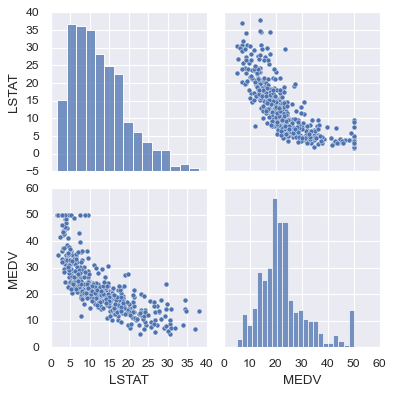

In [23]:
# pairplot LSTAT and MEDV
medv_lstat = housing_df[['LSTAT', 'MEDV']]
sns.pairplot(medv_lstat)

Text(0, 0.5, 'MEDV')

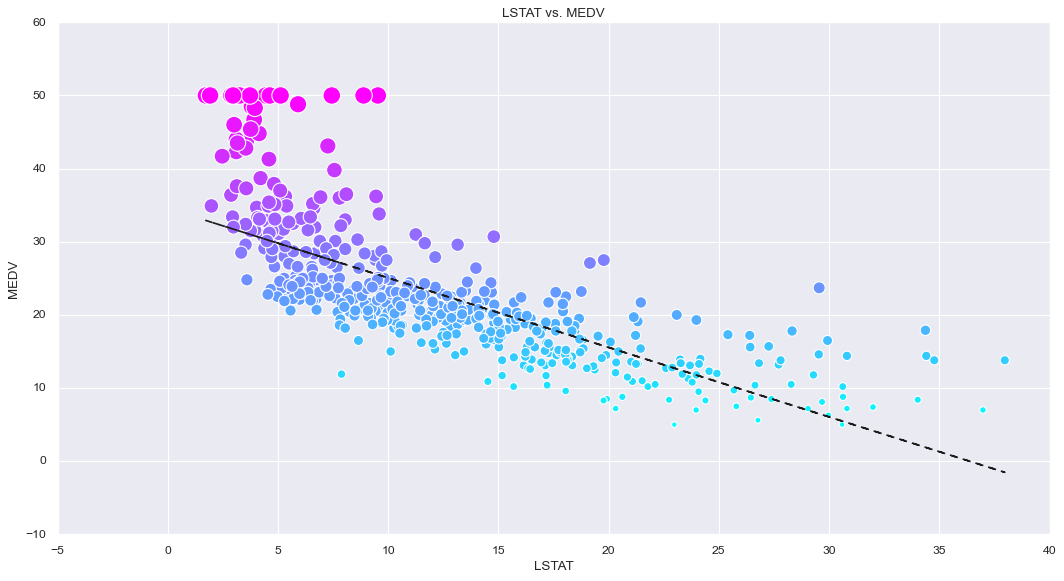

In [24]:
# scatter plot LSTAT and MEDV with linear regression

# set variables for plotting
x=housing_df.LSTAT
y=housing_df.MEDV

# create scatter plot
plt.scatter(x=x, y=y, c=housing_df.MEDV, cmap='cool', s=housing_df.MEDV*5)

# fit regression line and plot
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), "k--")

# update plot labels
plt.title('LSTAT vs. MEDV')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

Text(0, 0.5, 'LSTAT')

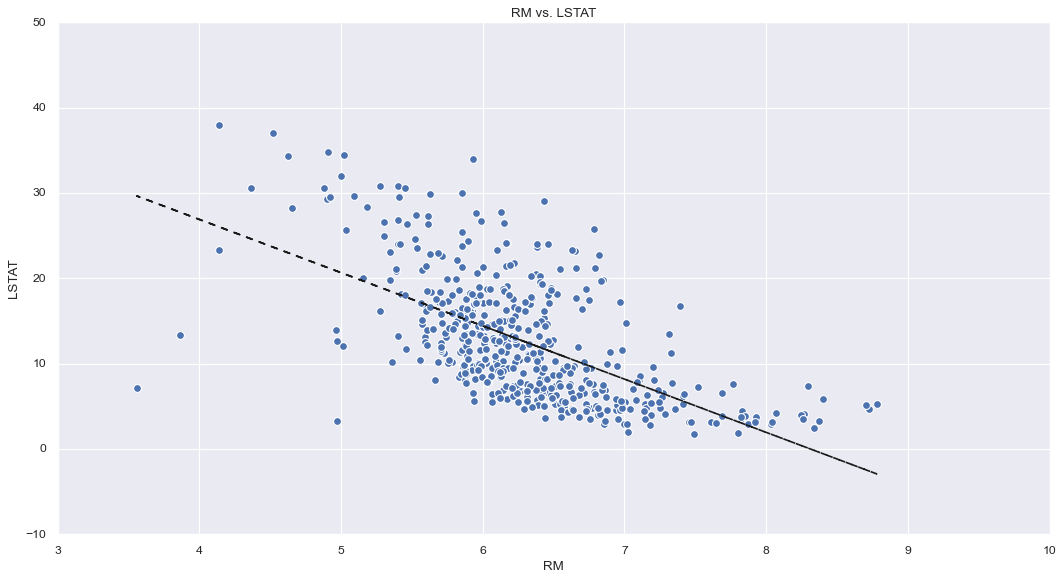

In [25]:
# scatter plot RM and LSTAT with linear regression

# set variables for plotting
x=housing_df.RM
y=housing_df.LSTAT

# create scatter plot
plt.scatter(x=x, y=y, s=50)

# fit regression line and plot
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), "k--")

# update plot labels
plt.title('RM vs. LSTAT')
plt.xlabel('RM')
plt.ylabel('LSTAT')

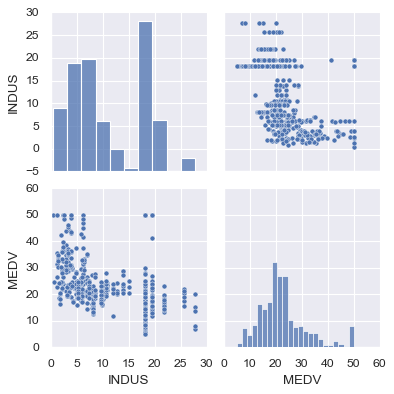

In [26]:
# pairplot INDUS and MEDV
medv_ind = housing_df[['INDUS', 'MEDV']]
sns.pairplot(medv_ind)

Text(0, 0.5, 'MEDV')

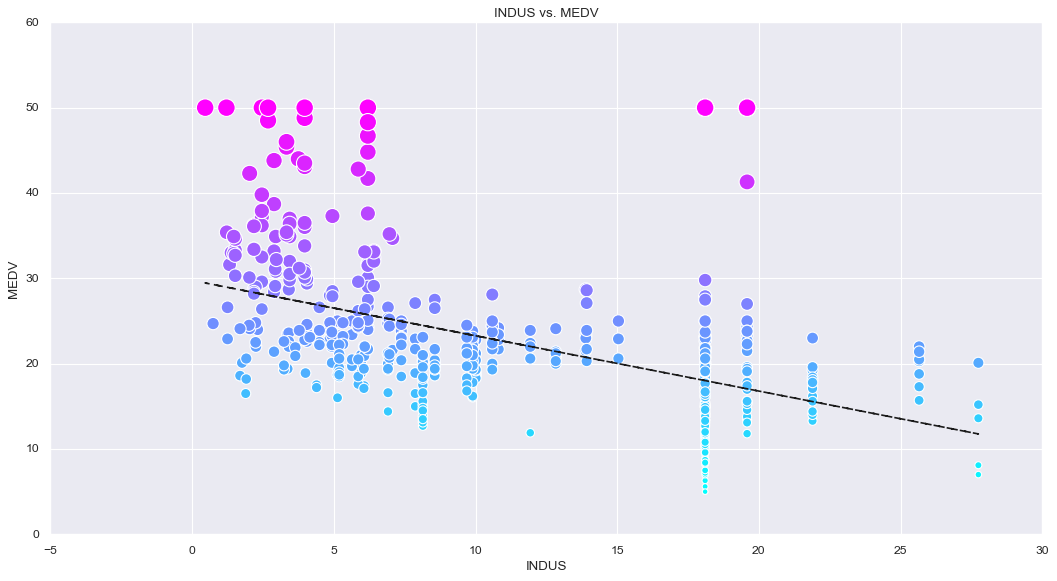

In [27]:
# scatter plot INDUS and MEDV with linear regression

# set variables for plotting
x=housing_df.INDUS
y=housing_df.MEDV

# create scatter plot
plt.scatter(x=x, y=y, c=housing_df.MEDV, cmap='cool', s=housing_df.MEDV*5)

# fit regression line and plot
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), "k--")

# update plot labels
plt.title('INDUS vs. MEDV')
plt.xlabel('INDUS')
plt.ylabel('MEDV')

Text(0, 0.5, 'TAX')

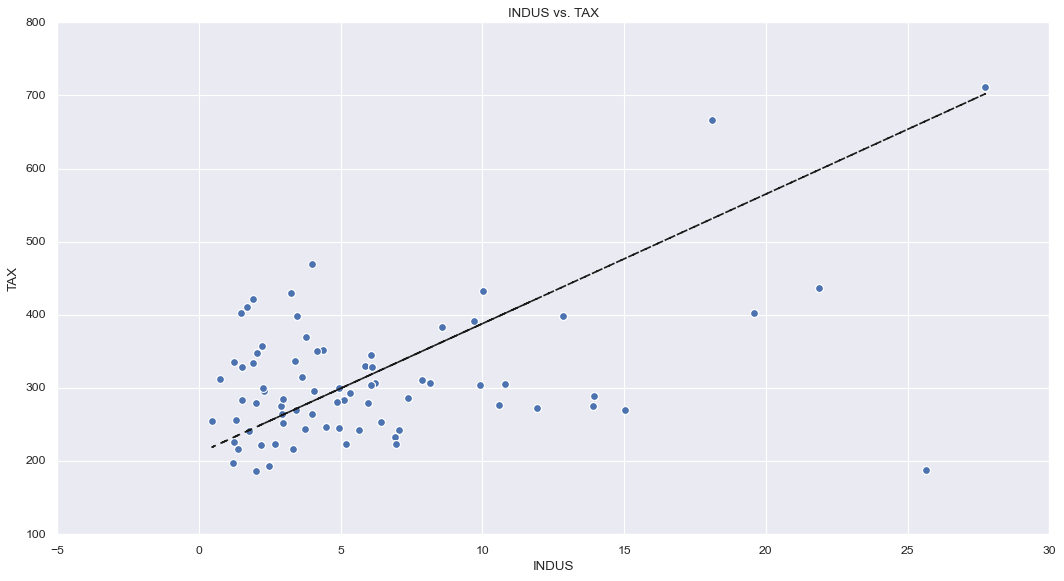

In [28]:
# scatter plot INDUS and TAX with linear regression

# set variables for plotting
x=housing_df.INDUS
y=housing_df.TAX

# create scatter plot
plt.scatter(x=x, y=y, s=50 )

# fit regression line and plot
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), "k--")

# update plot layout
plt.title('INDUS vs. TAX')
plt.xlabel('INDUS')
plt.ylabel('TAX')

Text(0, 0.5, 'LSTAT')

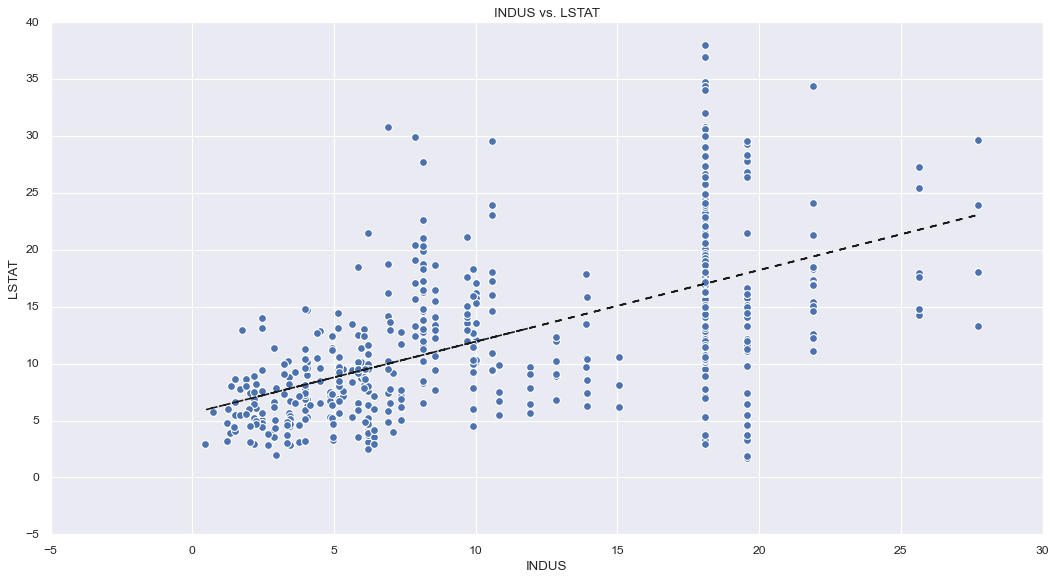

In [29]:
# scatter plot INDUS and LSTAT with linear regression

# set variables for plotting 
x=housing_df.INDUS
y=housing_df.LSTAT

# create scatter plot
plt.scatter(x=x, y=y, s=50 )

# fit regression and plot
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), "k--")

# update plot labels
plt.title('INDUS vs. LSTAT')
plt.xlabel('INDUS')
plt.ylabel('LSTAT')

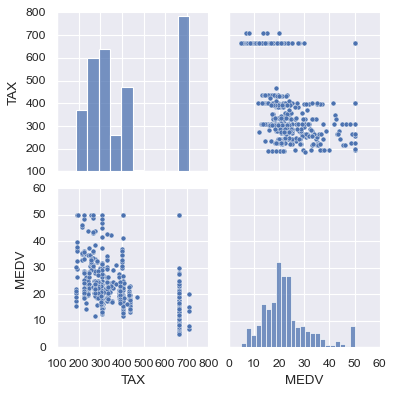

In [30]:
# pairplot TAX and MEDV
medv_tax = housing_df[['TAX', 'MEDV']]
sns.pairplot(medv_tax)

Text(0, 0.5, 'MEDV')

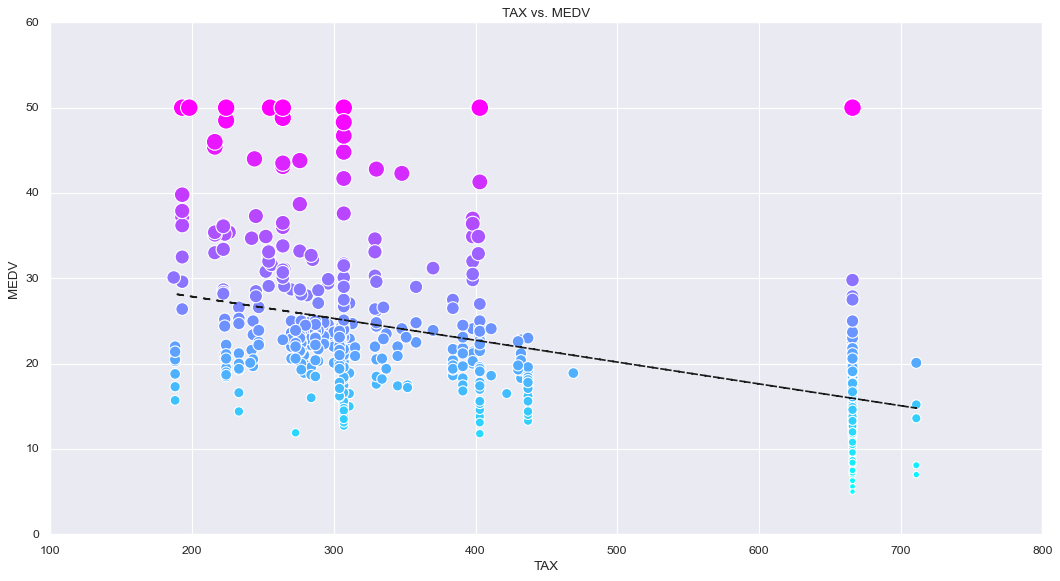

In [31]:
# scatter plot TAX and MEDV with linear regression

# set variables for plotting
x=housing_df.TAX
y=housing_df.MEDV

# create scatter plot
plt.scatter(x=x, y=y,  c=housing_df.MEDV, cmap='cool', s=housing_df.MEDV*5)

# fit regression and plot
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), "k--")

# update plot labels
plt.title('TAX vs. MEDV')
plt.xlabel('TAX')
plt.ylabel('MEDV')

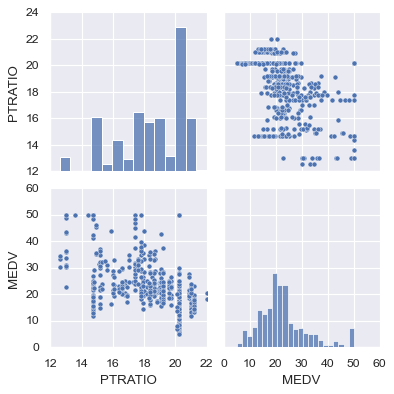

In [32]:
# pairplot PTRATIO and MEDV
medv_pt = housing_df[['PTRATIO', 'MEDV']]
sns.pairplot(medv_pt)

Text(0, 0.5, 'MEDV')

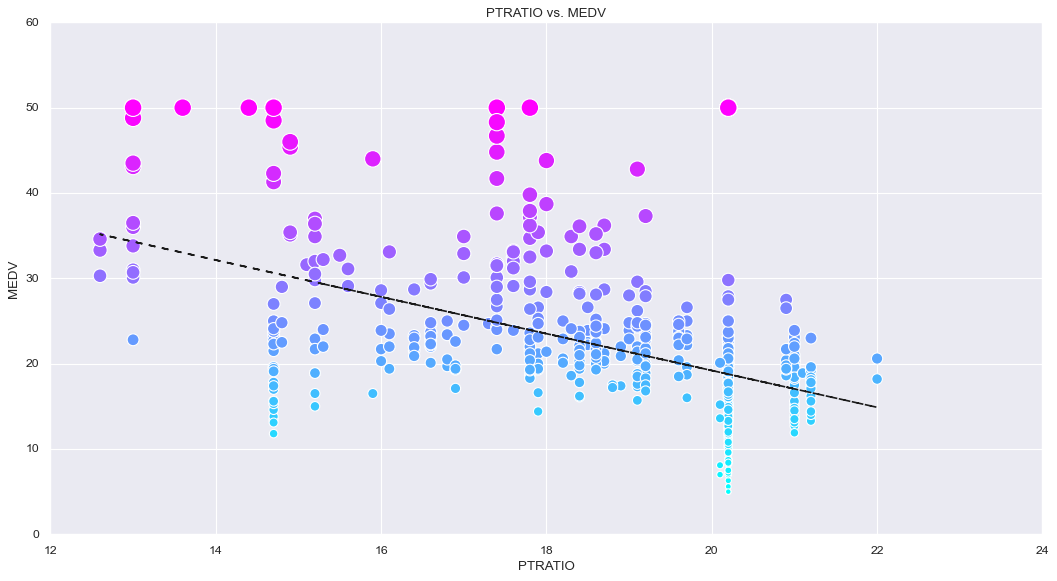

In [33]:
# scatter plot PTRATIO and MEDV with linear regression

# set variables for plotting
x=housing_df.PTRATIO
y=housing_df.MEDV

# create scatter plot
plt.scatter(x=x, y=y, c=housing_df.MEDV, cmap='cool', s=housing_df.MEDV*5)

# fit regression and plot
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), "k--")

# update plot layout
plt.title('PTRATIO vs. MEDV')
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')

# Low Correlation Feature Visuals

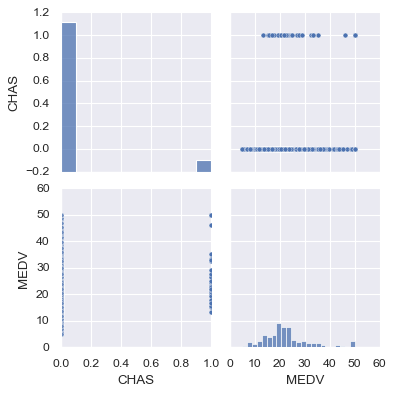

In [34]:
# pairplot MEDV and CHAS
medv_chas = housing_df[['CHAS', 'MEDV']]
sns.pairplot(medv_chas)

Text(0, 0.5, 'MEDV')

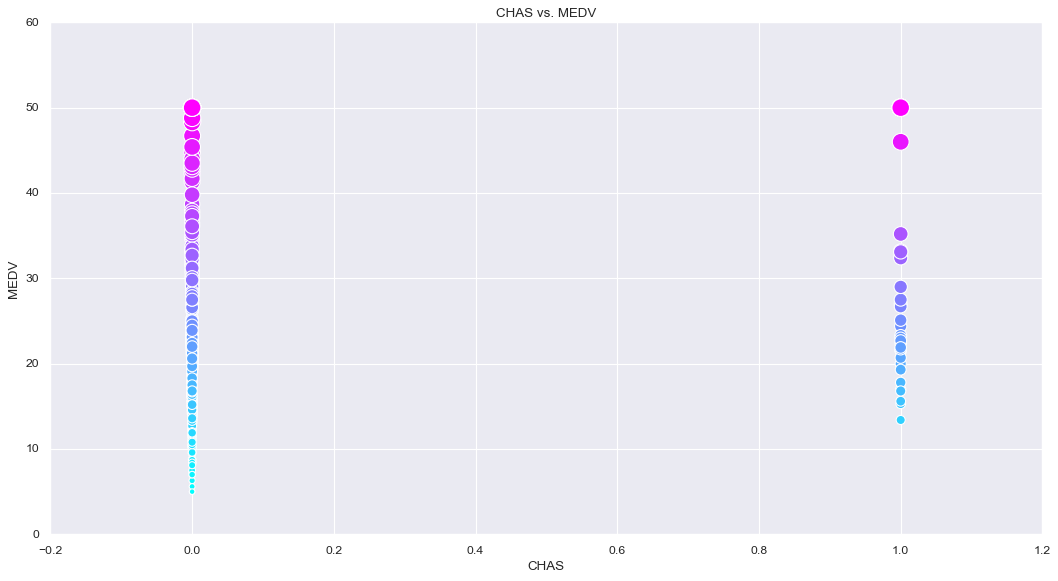

In [35]:
# scatter plot MEDV and CHAS
plt.scatter(x=housing_df.CHAS, y=housing_df.MEDV, c=housing_df.MEDV, cmap='cool', s=housing_df.MEDV*5)
plt.title('CHAS vs. MEDV')
plt.xlabel('CHAS')
plt.ylabel('MEDV')

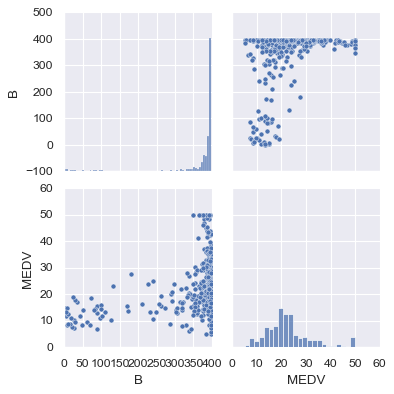

In [36]:
# pairplot for MEDV and B
medv_B = housing_df[['B', 'MEDV']]
sns.pairplot(medv_B)

Text(0, 0.5, 'MEDV')

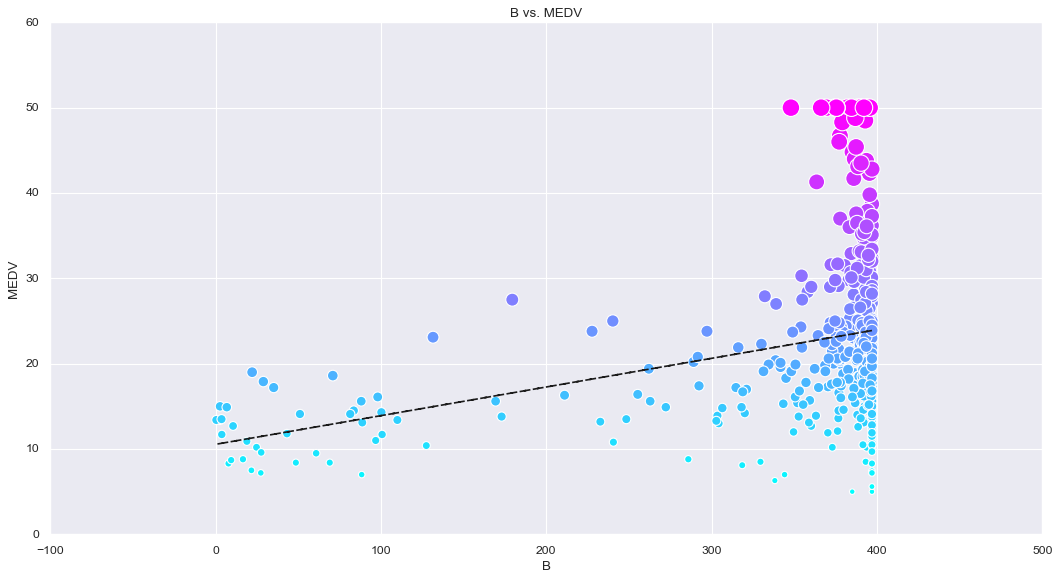

In [37]:
# scatter plot B and MEDV with linear regression

# set variables for plotting
x=housing_df.B
y=housing_df.MEDV

# create scatter plot
plt.scatter(x=x, y=y, c=housing_df.MEDV, cmap='cool', s=housing_df.MEDV*5)

# fit regression and plot
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), "k--")

# update plot labels
plt.title('B vs. MEDV')
plt.xlabel('B')
plt.ylabel('MEDV')

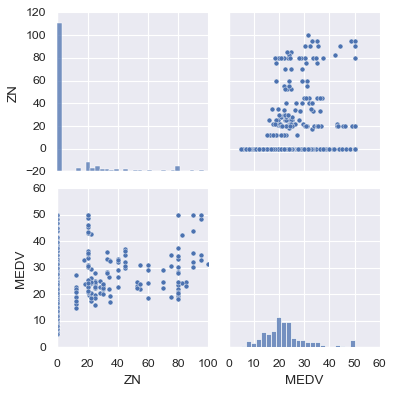

In [38]:
# pairplot ZN and MEDV
medv_zn = housing_df[['ZN', 'MEDV']]
sns.pairplot(medv_zn)

Text(0, 0.5, 'MEDV')

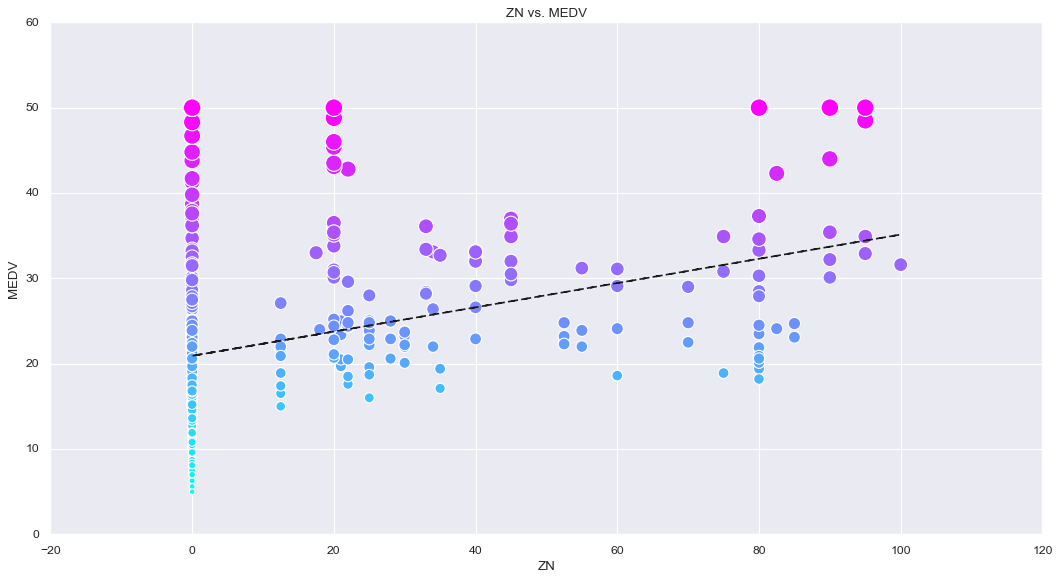

In [39]:
# scatter plot ZN and MEDV with linear regression

# set variables for plotting
x=housing_df.ZN
y=housing_df.MEDV

# create scatter plot
plt.scatter(x=x, y=y, c=housing_df.MEDV, cmap='cool', s=housing_df.MEDV*5)

# fit regression and plot
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), "k--")

# update plot labels
plt.title('ZN vs. MEDV')
plt.xlabel('ZN')
plt.ylabel('MEDV')

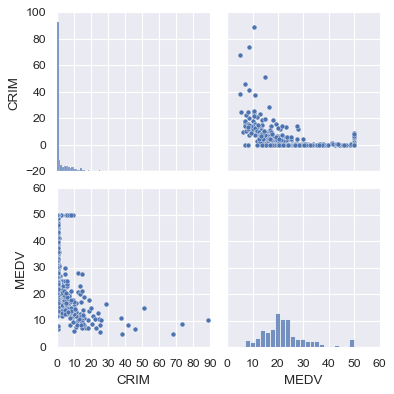

In [40]:
# pairplot CRIM and MEDV
medv_crim = housing_df[['CRIM', 'MEDV']]
sns.pairplot(medv_crim)

Text(0, 0.5, 'MEDV')

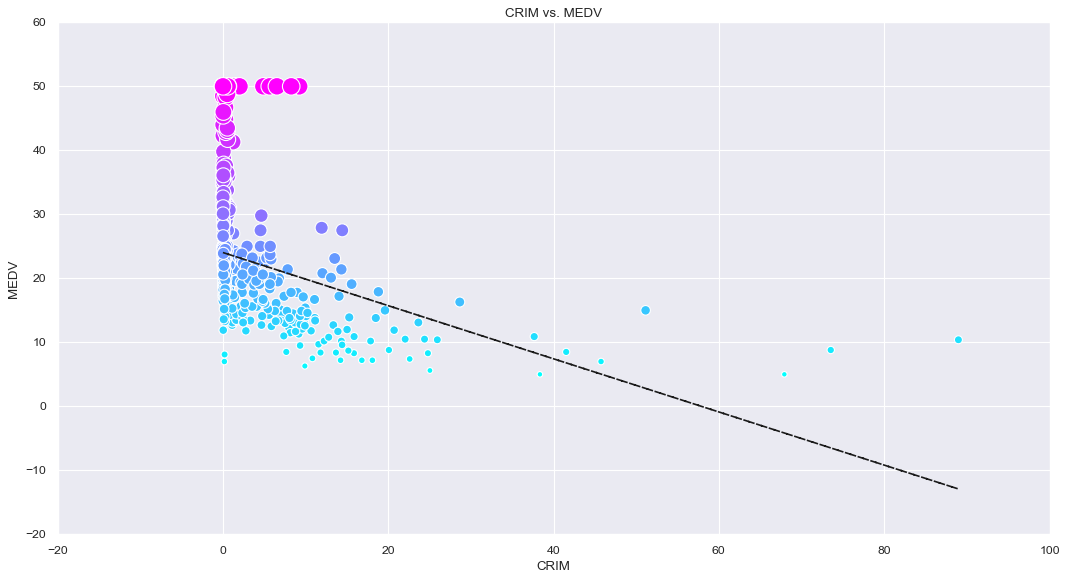

In [41]:
# scatter plot for CRIM and MEDV with linear regression

# set variables for plotting
x=housing_df.CRIM
y=housing_df.MEDV

# create scatter plot
plt.scatter(x=x, y=y, c=housing_df.MEDV, cmap='cool', s=housing_df.MEDV*5)

# fit regression and plot
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), "k--")

# update plot labels
plt.title('CRIM vs. MEDV')
plt.xlabel('CRIM')
plt.ylabel('MEDV')

# Split Data into Training and Testing Sets

In [42]:
# split data into training and testing sets, 80% training data
train, test = train_test_split(housing_df, test_size=0.2)

In [43]:
# check training data shape
train.shape

(404, 15)

In [44]:
# check testing data shap
test.shape

(102, 15)

In [45]:
# show sample of training data
train.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,ID
361,3.83684,0.0,18.10,0,0.770,6.251,91.1,2.2955,24,666.0,20.2,350.65,14.19,19.9,361
34,1.61282,0.0,8.14,0,0.538,6.096,96.9,3.7598,4,307.0,21.0,248.31,20.34,13.5,34
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666.0,20.2,35.05,21.22,17.2,411
164,2.24236,0.0,19.58,0,0.605,5.854,91.8,2.4220,5,403.0,14.7,395.11,11.64,22.7,164
49,0.21977,0.0,6.91,0,0.448,5.602,62.0,6.0877,3,233.0,17.9,396.90,16.20,19.4,49


# Export to Database

In [4]:
# export prepared data to SQL database using SQLAlchemy
# create database connection 
user = "Housing_Database"
password = db_key
host = "housing-database.c6zoxppofyzr.us-east-1.rds.amazonaws.com"
port = '5432'
database = "postgres"

con_string = f'postgresql://{user}:{password}@{host}:{port}/{database}'

engine = create_engine(con_string)

In [47]:
# insert training data into table in database
train.to_sql('boston_housing_training', con=engine, index=False, if_exists='replace')

In [48]:
# test insertion with query
engine.execute("SELECT * FROM boston_housing_training").fetchone()

(4.75237, 0.0, 18.1, 0, 0.713, 6.525, 86.5, 2.4358, 24, 666.0, 20.2, 50.92, 18.13, 14.1, 455)

In [49]:
# insert testing data into table in database
test.to_sql('boston_housing_testing', con=engine, index=False, if_exists='replace')

In [50]:
# test insertion with query
engine.execute("SELECT * FROM boston_housing_testing").fetchone()

(1.05393, 0.0, 8.14, 0, 0.538, 5.935, 29.3, 4.4986, 4, 307.0, 21.0, 386.85, 6.58, 23.1, 16)

In [51]:
# insert complete data in table in database
housing_df.to_sql('boston_housing_complete', con=engine, index=False, if_exists='replace')

In [52]:
# test insertion with query
engine.execute("SELECT * FROM boston_housing_complete").fetchone()

(0.00632, 18.0, 2.31, 0, 0.538, 6.575, 65.2, 4.09, 1, 296.0, 15.3, 396.9, 4.98, 24.0, 0)

In [53]:
# save csv of training and testing sets
train.to_csv('Resources/train.csv')
test.to_csv('Resources/test.csv')